In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sdf_helper as sh
import os as os 
import pandas as pd
from matplotlib.lines import Line2D
%matplotlib inline
hard_drive = '/volumes/My Passport/MMath Project'
os.chdir(hard_drive)

/Users/Conanliptrott/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


### Global Matplotlib Formatting

In [3]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 20  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 20 

### Extractor Functions

In [4]:
def value_extractor(simulation, percent):
    df = pd.read_csv(simulation+'/rates_times.csv')
    
    if len(df.columns)==2:
        df = df.set_index(df.columns[0])
    else:
        df = df.drop('Unnamed: 0', axis=1, errors='ignore')  
        df = df.set_index(df.columns[0])
       
    l = df.loc['Lundquist Number', '0']
    r = df.loc['t_rec'+str(percent), '0']
    v = df.loc['v_rate'+str(percent), '0']
    
    return  l, r, v

def value_extractor_800(simulation):
    df = pd.read_csv(simulation+'/original_rates.csv')
    
    if len(df.columns)==2:
        df = df.set_index(df.columns[0])
    else:
        df = df.drop('Unnamed: 0', axis=1, errors='ignore')  
        df = df.set_index(df.columns[0])
       
    l = df.loc['Lundquist Number', '0']
    r = df.loc['t_rec_original', '0']
    v = df.loc['v_rec_original', '0']
    
    return  l, r, v

def value_extractor_rate(simulation, percent):
    df = pd.read_csv(simulation+'/rates_times.csv')
    if len(df.columns)==2:
        df = df.set_index(df.columns[0])
    else:
        df = df.drop('Unnamed: 0', axis=1, errors='ignore')  
        df = df.set_index(df.columns[0])
    

    v = df.loc['v_rate'+str(percent), '0']
    
    return  v

def original_rates(simulation):
    df = pd.read_csv(simulation+'/original_rates.csv')
    if len(df.columns)==2:
        df = df.set_index(df.columns[0])
    else:
        df = df.drop('Unnamed: 0', axis=1, errors='ignore')  
        df = df.set_index(df.columns[0])
    

    v = df.loc['v_rec_original', '0']
    t = df.loc['t_rec_original', '0']
    
    return  t,v

def python_output(simulation):
    df = pd.read_csv(simulation+'/python_output.csv')
    if len(df.columns)==2:
        df = df.set_index(df.columns[0])
    else:
        df = df.drop('Unnamed: 0', axis=1, errors='ignore')  
        df = df.set_index(df.columns[0])
    
    
    t = df.loc['Reconnection Time', '0']
    v = 0.04/float(t)
    
    return t,v

### Reconnection Rate 

In [29]:
sim_folders_800 = ['sim_800_1','sim_800_2','sim_800_3','sim_800_4','sim_800_5','sim_800_6', 
                   'sim_800_7','sim_800_8','sim_800_9','sim_800_10','sim_800_11','sim_800_12',
                   'sim_800_13','sim_800_14','sim_800_15'] 
sim_folders_400 = ['sim_400_1','sim_400_2','sim_400_3','sim_400_4','sim_400_5','sim_400_6',
                   'sim_400_7','sim_400_8','sim_400_9','sim_400_10','sim_400_11','sim_400_12',
                   'sim_400_13','sim_400_14','sim_400_15']

In [30]:
ls = [1.00000000e-02 ,5.62341325e-03 ,3.16227766e-03 ,1.77827941e-03 ,1.00000000e-03  
    ,5.62341325e-04 ,3.16227766e-04 ,1.77827941e-04   ,1.00000000e-04  ,5.62341325e-05  
    ,3.16227766e-05, 1.77827941e-05, 1.00000000e-05  ,5.62341325e-06,3.16227766e-06]   
ls = [1/x for x in ls]

In [73]:
vs800 = []
ts800 = []
for sim in sim_folders_800:
    t,v = original_rates(sim)
    vs800.append(v)
    ts800.append(t)

vs400 = []
ts400 = []
for sim in sim_folders_400:
    t,v = python_output(sim)
    vs400.append(v)
    ts400.append(t)

percent = 0.4
vs400_dynamic = []
ts400_dynamic = []
for i in range(len(simulations)):
    v = value_extractor_rate(sim_folders_400[i], percent)
    x,t,y = value_extractor(sim_folders_400[i], percent)
    v = float(v)
    t = float(t)
    vs400_dynamic.append(v) #Normalise the reco rates
    ts400_dynamic.append(t) #Normalise the reco rates
    



### Main Reconenction Rate Plot

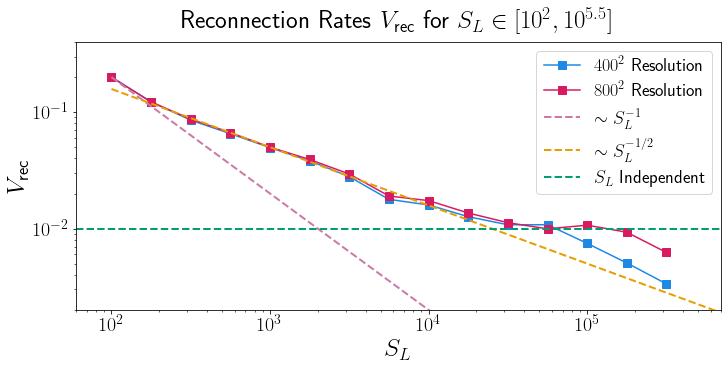

In [63]:
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

# 800^2 simulations
plt.plot(ls, vs400_dynamic, 's-',color='#1E88E5', markersize=8, label=r'$400^2$ Resolution') 
# 400^2 simulations
plt.plot(ls, vs800, 's-',color='#D81B60', ms=8, label=r'$800^2$ Resolution')


ax.set_xscale('log')
ax.set_yscale('log')

plt.ylim(0.002,0.4) 
plt.xlim(60,7*10**5) 

plt.xlabel(r'$S_L$', size=25)
plt.ylabel(r'$V_{\text{rec}}$', size=25)


#Scaling Lines
s = np.linspace(100, 4*10**6, 100000)
sp_mean_ls = np.mean(ls[3:9])  # Python uses 0-based indexing, and slicing is exclusive at the end
sp_mean_rs = np.mean(vs800[3:9])
d_mean_ls = np.mean(ls[0:3])  # Python uses 0-based indexing, and slicing is exclusive at the end
d_mean_rs = np.mean(vs800[0:3])


# Line 1: S_L^-1, intersecting the first data point
c1 = vs800[0] * ls[0]  # Constant calculated to intersect the first data point
plt.plot(s, c1/s, '--', color='#CC79A7', label=r'$ \sim S_L^{-1}$', linewidth=2)

# Line 2: S_L^-0.5, intersecting the fifth data point
c2 = vs800[4] * ls[4]**0.5  # Constant calculated to intersect the fifth data point
plt.plot(s, c2/s**0.5, '--', color='#E69F00', label=r'$ \sim S_L^{-1/2}$', linewidth=2)

plt.axhline(y=0.01, color='#009E73', linestyle='--', label=r'$S_L$ Independent', linewidth=2)


#plt.legend(handles, labels, prop = { "size": 15})
plt.legend(prop = { "size": 18})
plt.title(r'Reconnection Rates $V_{\text{rec}}$ for $S_L \in [10^2, 10^{5.5}]$', size=25, pad=15)

#plt.savefig('v_rates.png')
plt.show()


### Reconnection Times 

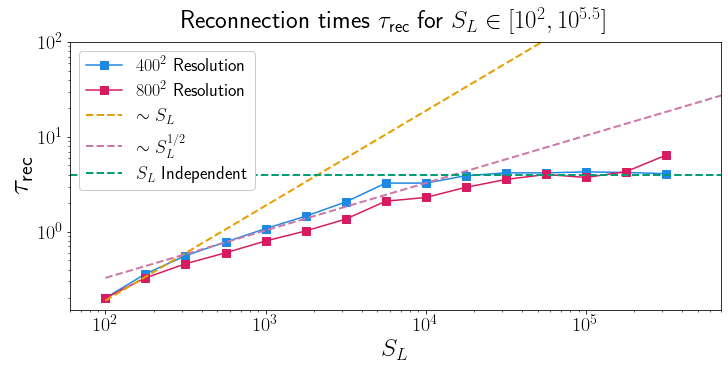

In [92]:
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

# 400^2 simulations
plt.plot(ls, ts400_dynamic, 's-',color='#1E88E5', markersize=8, label=r'$400^2$ Resolution') 
# 800^2 simulations
plt.plot(ls, ts800, 's-',color='#D81B60', ms=8, label=r'$800^2$ Resolution')


ax.set_xscale('log')
ax.set_yscale('log')

plt.ylim(0.15,10**2) 
plt.xlim(60,7*10**5) 

plt.xlabel(r'$S_L$', size=25)
plt.ylabel(r'$\tau_{\text{rec}}$', size=30)


# Scaling Lines
s = np.linspace(100, 4*10**6, 1000)
sp_mean_ls = np.mean(ls[3:9]) 
sp_mean_rs = np.mean(ts400_dynamic[3:9])
d_mean_ls = np.mean(ls[0:3])  
d_mean_rs = np.mean(ts400_dynamic[0:3])

# Adjust c1 based on the mean values
c1 = sp_mean_rs / sp_mean_ls**0.5
c2 = d_mean_rs / d_mean_ls**1

plt.loglog(s, c2*s**1, '--', color='#E69F00', label=r'$ \sim S_L$', linewidth=2)
plt.loglog(s, c1*s**0.5, '--', color='#CC79A7', label=r'$ \sim S_L^{{1/2}}$', linewidth=2)

plt.axhline(y=4, color='#009E73', linestyle='--', label=r'$S_L$ Independent', linewidth=2)





#plt.legend(handles, labels, prop = { "size": 15})
plt.legend(prop = { "size": 18}, framealpha=1)
plt.title(r'Reconnection times $\tau_{\text{rec}}$ for $S_L \in [10^2, 10^{5.5}]$', size=25, pad=15)

plt.savefig('reco_times.png')
plt.show()


### Grid Effects Plot

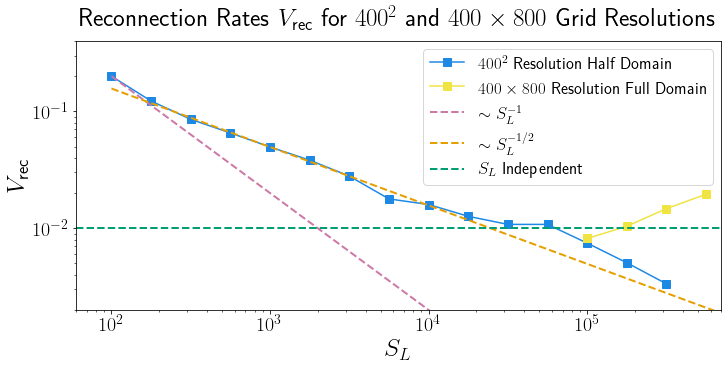

In [64]:
fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

plt.plot(ls, vs400_dynamic, 's-',color='#1E88E5', markersize=8, label=r'$400^2$ Resolution Half Domain') 

grid_ls = [1/1.77827941e-6, 1/3.16227766e-6,1/5.62341325e-6, 1/1e-5]
grid_vs = [ 0.019551, 0.014718, 0.010398, 0.008175] # Manually copied from HPC server

plt.plot(grid_ls, grid_vs, 's-',color='#F0E442', markersize=8, label=r'$400 \times 800$ Resolution Full Domain')

ax.set_xscale('log')
ax.set_yscale('log')

plt.ylim(0.002,0.4) 
plt.xlim(60,7*10**5) 

plt.xlabel(r'$S_L$', size=25)
plt.ylabel(r'$V_{\text{rec}}$', size=25)


#Scaling Lines
s = np.linspace(100, 4*10**6, 100000)
sp_mean_ls = np.mean(ls[3:9])  # Python uses 0-based indexing, and slicing is exclusive at the end
sp_mean_rs = np.mean(vs400_dynamic[3:9])
d_mean_ls = np.mean(ls[0:3])  # Python uses 0-based indexing, and slicing is exclusive at the end
d_mean_rs = np.mean(vs400_dynamic[0:3])


# Line 1: S_L^-1, intersecting the first data point
c1 = vs400_dynamic[0] * ls[0]  # Constant calculated to intersect the first data point
plt.plot(s, c1/s, '--', color='#CC79A7', label=r'$ \sim S_L^{-1}$', linewidth=2)

# Line 2: S_L^-0.5, intersecting the fifth data point
c2 = vs400_dynamic[4] * ls[4]**0.5  # Constant calculated to intersect the fifth data point
plt.plot(s, c2/s**0.5, '--', color='#E69F00', label=r'$ \sim S_L^{-1/2}$', linewidth=2)

plt.axhline(y=0.01, color='#009E73', linestyle='--', label=r'$S_L$ Independent', linewidth=2)


#plt.legend(handles, labels, prop = { "size": 15})
plt.legend(prop = { "size": 17})
plt.title(r'Reconnection Rates $V_{\text{rec}}$ for $400^2$ and $400 \times 800$ Grid Resolutions', size=25, pad=15)
#plt.savefig('grid_effects.png')
plt.show()